# 어떤 고객들이 떠나가고 있는가?
#### 게임 개발 회사 A기업의 유저수가 줄고 있음. 94,185명에서 76,175명으로 감소함
- 광고: 지난 달과 비교했을 때 광고 집행은 변함이 없음
- 기획: 매주, 매월 시행하고 있는 게임 속 이벤트 역시 변함이 없음
#### 이유가 무엇일까?
![](1-1.jpg)
#### 유력가설: 성별 혹은 연령 등 특정 유저 층에서 탈퇴한 유저가 많다.
#### 해결책: 성별 연령별로 유저 변화수를 살펴보자.

## 1. Loading data

#### 1) 필요한 라이브러리들을 호출

In [1]:
#데이터 분석에 필요한 패키지들을 파이썬으로 호출
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2) 각 변수별로 데이터 할당 

In [2]:
dau = pd.read_csv("dau.csv", sep=",")
user = pd.read_csv("user_info.csv", sep=",")

![](1-2.jpg)

#### 3) 호출된 데이터 정보 확인

In [3]:
# 로그인해서 활동하는 날 생기는 로그 데이터
dau.head()

,log_date,app_name,user_id
0,2017-08-01,game-01,33754
1,2017-08-01,game-01,28598
2,2017-08-01,game-01,30306
3,2017-08-01,game-01,117
4,2017-08-01,game-01,6605


In [4]:
# 가입한 사용자정보 데이터
user.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2017-04-15,game-01,1,M,40,iOS
1,2017-04-15,game-01,2,M,10,Android
2,2017-04-15,game-01,3,F,40,iOS
3,2017-04-15,game-01,4,M,10,Android
4,2017-04-15,game-01,5,M,40,iOS


# 2. Data cleaning

#### 1) 각 데이터들을 결합

In [5]:
# Dau 데이터에 user 데이터를 결합하기
DauUser = dau.merge(user, on=["user_id", "app_name"])
DauUser.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2017-08-01,game-01,33754,2017-08-01,M,20,iOS
1,2017-08-02,game-01,33754,2017-08-01,M,20,iOS
2,2017-08-01,game-01,28598,2017-07-16,M,50,iOS
3,2017-08-04,game-01,28598,2017-07-16,M,50,iOS
4,2017-08-12,game-01,28598,2017-07-16,M,50,iOS


#### 2)월별 정렬을 위한 문자 처리

In [6]:
#일자 데이터 중 '월'을 떼어내 별도의 열로 저장
DauUser['log_month'] = DauUser['log_date'].str[:7]
DauUser[:5]

,log_date,app_name,user_id,install_date,gender,generation,device_type,log_month
0,2017-08-01,game-01,33754,2017-08-01,M,20,iOS,2017-08
1,2017-08-02,game-01,33754,2017-08-01,M,20,iOS,2017-08
2,2017-08-01,game-01,28598,2017-07-16,M,50,iOS,2017-08
3,2017-08-04,game-01,28598,2017-07-16,M,50,iOS,2017-08
4,2017-08-12,game-01,28598,2017-07-16,M,50,iOS,2017-08


# 3. Data analysis

#### 1)크로스 집계를 이용한 분석

#### 성별에 따른 접속 일자 

In [7]:
pd.crosstab(DauUser["log_month"], DauUser["gender"])

gender,F,M
log_month,,
2017-08,47358,46849
2017-09,38041,38150


#### 연령에 따른 접속일자

In [8]:
pd.crosstab(DauUser["log_month"], DauUser["generation"])

generation,10,20,30,40,50
log_month,,,,,
2017-08,18786,33682,28080,8830,4829
2017-09,15392,27241,22229,7494,3835


#### 성별-연령에 따른 접속일자 - 첫 번째 방법

In [9]:
pd.crosstab(DauUser["log_month"], columns=[DauUser["gender"], DauUser["generation"]])

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2017-08     9091  17192  14219  4599  2257  9695  16490  13861  4231  2572
2017-09     7316  13628  11460  3856  1781  8076  13613  10769  3638  2054

#### 디바이스 유형에 따른 접속일자

In [10]:
pd.crosstab(DauUser["log_month"], DauUser["device_type"])

device_type,Android,iOS
log_month,,
2017-08,46990,47217
2017-09,29659,46532


# 4. Data Visualization

#### 1) 디바이스 유형별 접속일자의 시각화 - 라인 그래프

In [11]:
data = pd.crosstab(DauUser["log_date"], DauUser["device_type"])

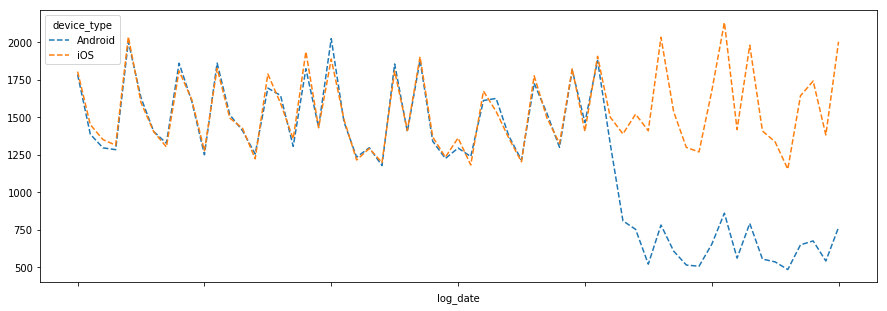

In [12]:
graph = pd.DataFrame(data)
graph.plot.line(figsize=(15, 5), style="--",)

#### 2) 디바이스 유형별 접속일자의 시각화 - Heat Map

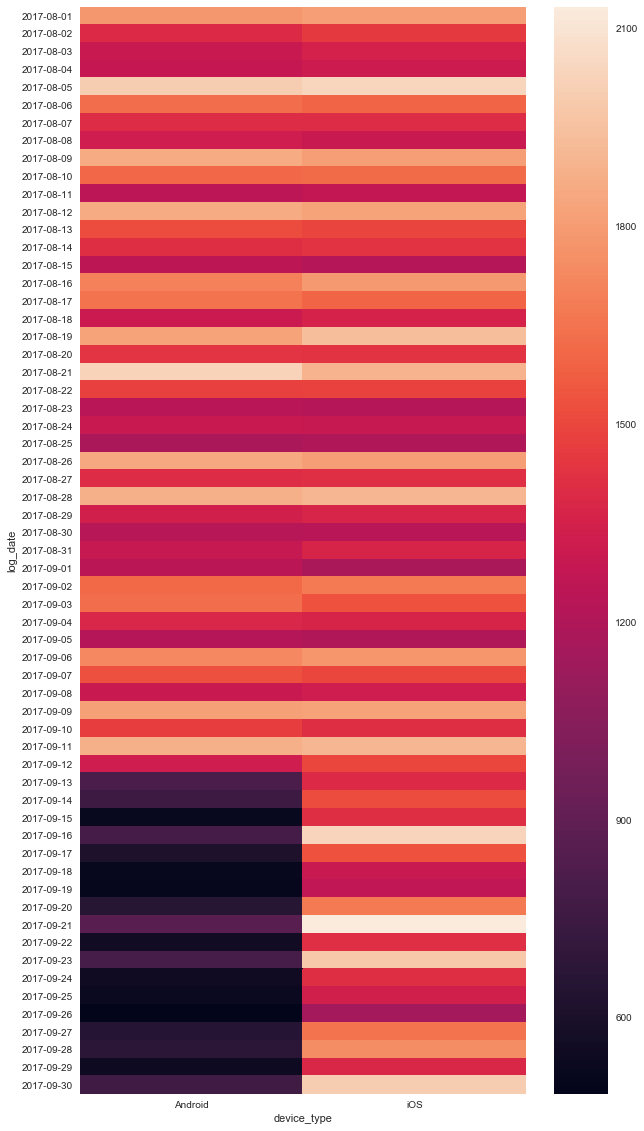

In [13]:
sns.set(rc={"figure.figsize":(10, 20)})
sns.heatmap(data)

#### 9월 초 iOS에 비해 Android에 큰 변화를 준 무엇(?)인가 발생함.
#### 관련 팀에 문제가 있었는지 확인해봐야 함.